In [13]:
from __future__ import division
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Perturbation methods
Ref: Logan Ch 3

We are looking to make more mathematically precise the idea that in an equation, some effects can be very small compared with others. Like when we did the projectile problem, we implicitly assumed that air resistance was small compared with gravity. If we scale our equations correctly, the terms that are "small" will end up with a small coefficient parameter, say $\varepsilon$. A *perturbation solution* is an approximate solution that is the first few terms of a Taylor-like explansion in the parameter $\varepsilon$.

## Regular perturbation
Just to fix a bit of terminology and notation, we'll use a generic second order ODE to define some terms. Let the ODE be given by
\begin{equation}
    F(t, y, y', y'', \varepsilon) = 0, \quad t \in I
\end{equation}
We assume that scaling has already been done, and we have a small parameter $\varepsilon$. We write $\varepsilon \ll 1.$. 

### Perturbation series
A *perturbation series* is a power series in $\varepsilon$ of the form
\begin{equation}
    y_0(t) + \varepsilon y_1(t) + \varepsilon^2 y_2(t) + \cdots
\end{equation}

### Regular perturbation method
The *regular perturbation* method is to assume a perturbation series solution to the ODE, and to substitute it into the differential equation. One then solves for $y_0, y_1, $ etc. The first few terms form a *perturbation solution* or *perturbation approximation*.
* The method is successful if the approximation is *uniform* (more later)
* $y_0$ is called the *leading order* term
* If the method works, $y_0$ solves the *unperturbed problem* $F(t, y, y', y'', 0) = 0, \quad t \in I$.
* The original problem is then called the perturbed problem.

Note, regular perturbation often fails to work, and we'll address this situation a little later. We'll now illustrate the method using examples

## Example 3.1 (quadratic)
Consider:
\begin{equation}
    x^2 + 2\varepsilon x - 3 = 0, \quad \varepsilon \ll 1.
\end{equation}
Assume a perturbation series solution $x = x_0 + \varepsilon x_1 + \varepsilon^2 x_2 + \cdots$. We want to solve for the $x_i$. We subsitute into the equation
\begin{equation}
    (x_0 + \varepsilon x_1 + \cdots)^2 + 2\varepsilon (x_0 + \varepsilon x_1 + \cdots) - 3 = 0
\end{equation}

Next step is to collect terms according to powers of $\varepsilon$:
\begin{equation}
    (x_0^2 - 3) + (2x_0x_1 + 2x_0) \varepsilon + (x_1^2 + 2x_0x_2 + 2x_1) \varepsilon^2 + \cdots = 0
\end{equation}

We then need to match left and right hand sides, i.e. each coefficient must equal zero. We then solve in sequence. First
\begin{equation}
    x_0^2 - 3 = 0 \implies x_0 = \pm \sqrt{3}
\end{equation}

Then, using this, we can solve the next for $x_1$:
\begin{equation}
    2x_0 (x_1 + 1) = 0 \implies x_1 = -1
\end{equation}

Then,
\begin{align}
    x_1^2 + 2x_0x_2 + 2x_1 &= 0 \\
    \text{becomes } 2x_0 x_2 - 1 &= 0 \implies x_2 = \frac{1}{2x_0} = \pm \frac{1}{2\sqrt{3}}
\end{align}

and we can continue. So we have two approximate solutions (according to the $\pm$):
\begin{align}
    x &= \sqrt{3} - \varepsilon + \frac{1}{2\sqrt{3}}\varepsilon^2 + \cdots , \\
    x &= -\sqrt{3} - \varepsilon - \frac{1}{2\sqrt{3}}\varepsilon^2 + \cdots
\end{align}

In this particular problem, we *know* the exact solution (using the quadratic formula). The method, however, is still useful even when we don't. Let's quickly compare how well our two-term approximation compares with the true solution for various values of epsilon $x = -\varepsilon \pm \sqrt{3 + \varepsilon^2}$. 

Exercise: verify that our perturbation solution actually matches the Taylor approximation of the true solution, at least to these three terms. This is not always the case, but it is for this problem

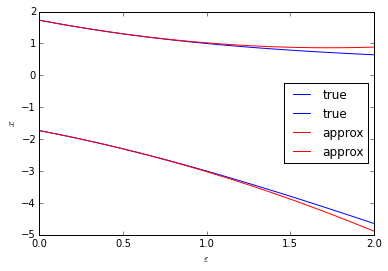

In [14]:
epsilon = linspace(0, 2, 100)
x_true = [-epsilon + sqrt(3 + epsilon**2), -epsilon - sqrt(3 + epsilon**2)]
x_approx = [sqrt(3) - epsilon + 1/(2*sqrt(3)) * epsilon**2, -sqrt(3) - epsilon - 1/(2*sqrt(3))*epsilon**2]

figure()
ax = gca()
ax.plot(epsilon, x_true[0], 'b', epsilon, x_true[1], 'b', label='true')
ax.plot(epsilon, x_approx[0], 'r', epsilon, x_approx[1], 'r', label='approx')
ax.set_xlabel('$\\varepsilon$')
ax.set_ylabel('$x$')
ax.legend(loc='best')

## Example 3.1.1 Motion in a resistive medium
Consider an object of mass $m$, moving in a medium, where the resistive force is of magnitude $av - bv^2$, where $v = v(\tau)$ is the velocity, and $a, b$ are positive with $b \ll a$ (note we can't really say this, but we'll clarify shortly), i.e. the linear part of the force dominates the nonlinear. Units for $a$ and $b$ must be force per velocity and force per velocity squared. By Newton's laws
\begin{equation}
    m\frac{dv}{d\tau} = -av + bv^2, \quad v(0) = V_0
\end{equation}

We'll now do a common-sense rescaling. Just by our intuition, we know that the body will slow down, and so $V_0$ seems a sensible velocity scale. For our timescale, the only possibility is $T_0 = m/a$. Note, if you solve the DE without the $v^2$ term, you get $v = V_0 e^{-\frac{\tau}{m/a}}$, so this also confirms our choice. So our dimensionless variables are
\begin{equation}
    y = \frac{v}{V_0}, \quad t = \frac{\tau}{m/a}
\end{equation}
The our problem is translated to

\begin{align}
    \frac{dy}{dt} &= -y + \varepsilon y^2, \quad t > 0,\\
    y(0) &= 1
\end{align}

where
\begin{equation}
    \varepsilon = \frac{bV_0}{a} \ll 1
\end{equation}
This is what we meant when we said $b \ll a$ before, it really means $bV_0 \ll a$. Let's do some differential equations practice (substitute $w = y^{-1}$):
\begin{equation}
    y_\text{ex} = \frac{e^{-t}}{1 + \varepsilon(e^{-t} - 1)}
\end{equation}
again, normally we can't find exact solutions, but it's useful to have this to compare our eventual perturbation solution with. We can also get a Taylor expansion of this (using $\frac{1}{1 + x} = 1 - x + x^2 - x^3 + \cdots$)
\begin{equation}
   y_\text{ex} = e^{-t} + \varepsilon (e^{-t} - e^{-2t}) + \varepsilon^2 (e^{-3t}- 2e^{-2t} + e^{-t}) + \cdots
\end{equation}

We'll compare our perturbation solution to this later

Now, let's use our method again. Assume a perturbation series of the form
\begin{equation}
    y = y_0(t) + \varepsilon y_1(t) + \varepsilon^2 y_2(t) + \cdots,
\end{equation}

And substitute into the ODE and expand powers again
\begin{align}
    (y_0'(t) + \varepsilon y_1'(t) + \varepsilon^2 y_2'(t) + \cdots) &= 
    -(y_0 + \varepsilon y_1 + \cdots) + \varepsilon(y_0 + \varepsilon y_1 + \cdots)^2 \\
    y_0(0) + \varepsilon y_1(0) + \cdots &= 1
\end{align}

We get a sequence of problems:
\begin{align}
    y_0' &= -y_0 & y_0(0) &= 1 \\
    y_1' &= -y_1 + y_0^2 & y_1(0) &= 0 \\
    y_2' &= -y_2 + 2y_0y_1 & y_2(0) &= 0 \\
    &\vdots & \vdots 
\end{align}

which we can solve in sequence:
\begin{equation}
    y_0 = e^{-t}
\end{equation}

we can now use $y_0$ to solve $y_1$
\begin{equation}
    y_1' = -y_1 + e^{-2t}, \qquad y_1(0) = 0 \implies y_1 = e^{-t} - e^{-2t}
\end{equation}

and we can use $y_0$ and $y_1$ to solve $y_2$
\begin{equation}
    y_2' = -y_2 + 2 e^{-t} \left(e^{-t} - e^{-2t}\right), \quad y_2(0) = 0 \implies y_2 = e^{-t} - 2e^{-2t} + e^{-3t}
\end{equation}

etc.

Note that again, this solution agrees with the Taylor approximation, so $y_\text{ex} - y_\text{approx} = m_1(t) + \varepsilon^3 + m_2(t) \varepsilon^4 + \cdots, \quad t > 0$, for bounded functions $m_1(t), m_2(t)$. For a fixed $t$, the error goes to zero as $\varepsilon \to 0$. We can show that this convergence is uniform as $\varepsilon \to 0$ in the interval $0 \le t < \infty$. (we'll cover this later).
